In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bhavani Balijireddi\Downloads\Price_Agriculture_commodities_Week.csv")
print(df)

            State  District    Market              Commodity      Variety  \
0         Gujarat    Amreli  Damnagar  Bhindi(Ladies Finger)       Bhindi   
1         Gujarat    Amreli  Damnagar                Brinjal        Other   
2         Gujarat    Amreli  Damnagar                Cabbage      Cabbage   
3         Gujarat    Amreli  Damnagar            Cauliflower  Cauliflower   
4         Gujarat    Amreli  Damnagar      Coriander(Leaves)    Coriander   
...           ...       ...       ...                    ...          ...   
23088  Uttrakhand  Haridwar   Roorkee                  Mango        Other   
23089  Uttrakhand  Haridwar   Roorkee   Mousambi(Sweet Lime)        Other   
23090  Uttrakhand  Haridwar   Roorkee         Pear(Marasebu)        Other   
23091  Uttrakhand  Haridwar   Roorkee                 Potato        Other   
23092  Uttrakhand  Haridwar   Roorkee                Pumpkin        Other   

        Grade Arrival_Date  Min Price  Max Price  Modal Price  
0         F

In [3]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [5]:
df.describe()

,Min Price,Max Price,Modal Price
count,23093.000000,23093.000000,23093.000000
mean,4187.077045,4976.034260,4602.917742
std,5472.783385,6277.308057,5843.822711
min,0.000000,0.000000,0.830000
25%,1750.000000,2000.000000,1955.000000
50%,2725.000000,3400.000000,3000.000000
75%,5000.000000,6000.000000,5500.000000
max,223500.000000,227500.000000,225500.000000


In [6]:
df.isnull().sum()

State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

State             27
District         403
Market          1289
Commodity        234
Variety          452
Grade              4
Arrival_Date       7
Min Price       1793
Max Price       2073
Modal Price     2071
dtype: int64

#  Univariate Analysis

# Numerical Data:

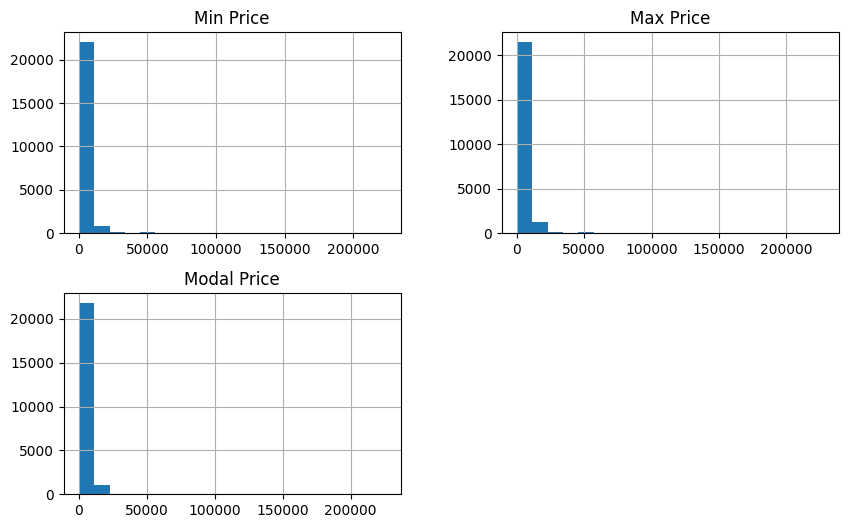

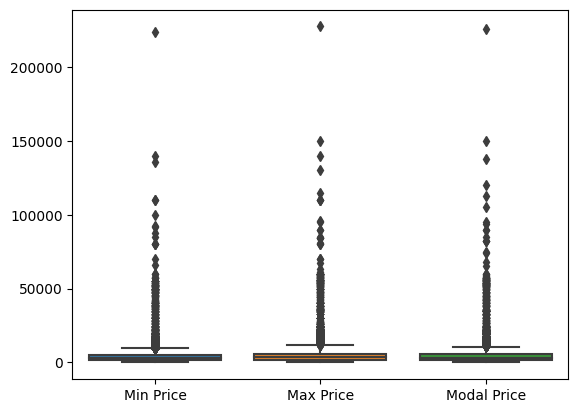

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
df[['Min Price', 'Max Price', 'Modal Price']].hist(bins=20, figsize=(10,6))
plt.show()

# Boxplot to check for outliers in prices
sns.boxplot(data=df[['Min Price', 'Max Price', 'Modal Price']])
plt.show()


# Categorical Data:

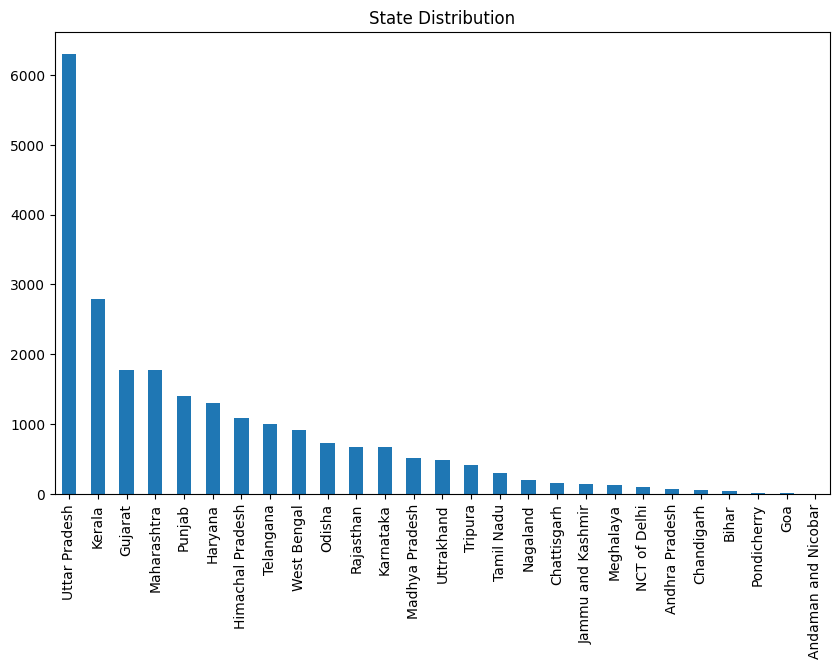

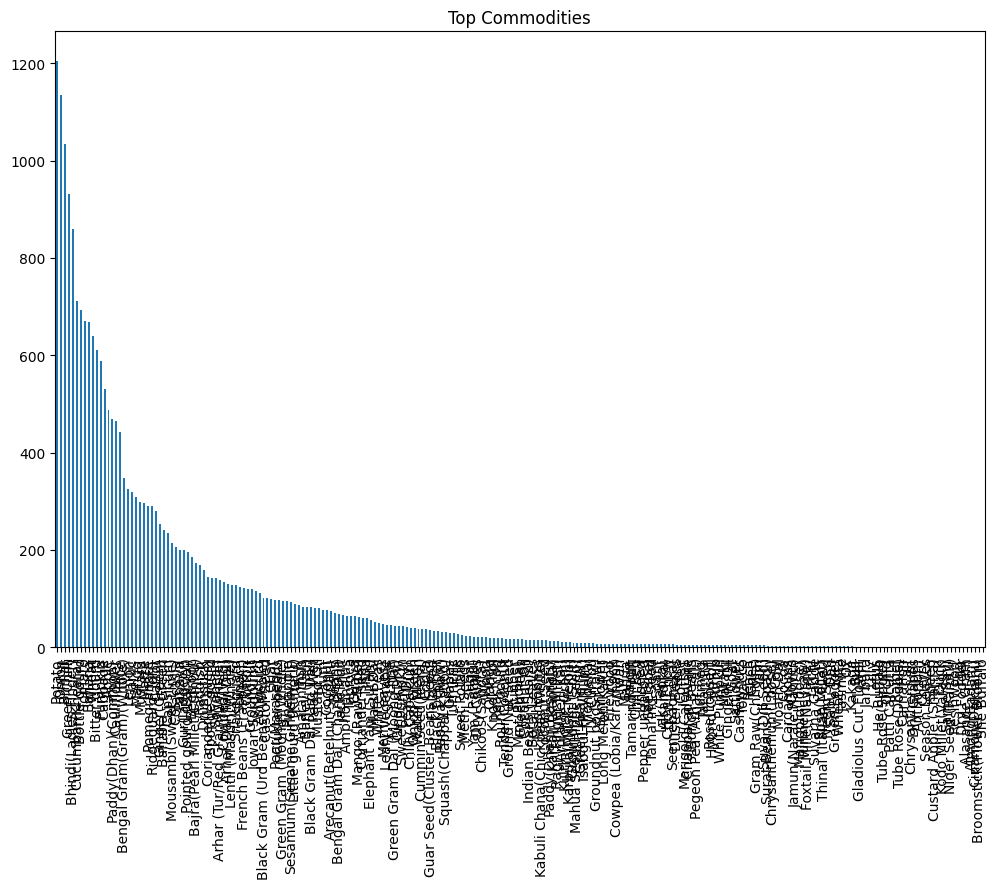

In [11]:
# Plot the frequency distribution of categorical variables
df['State'].value_counts().plot(kind='bar', figsize=(10,6), title='State Distribution')
plt.show()

df['Commodity'].value_counts().plot(kind='bar', figsize=(12,8), title='Top Commodities')
plt.show()


# Bivariate Analysis

# Price Variation by Commodity:

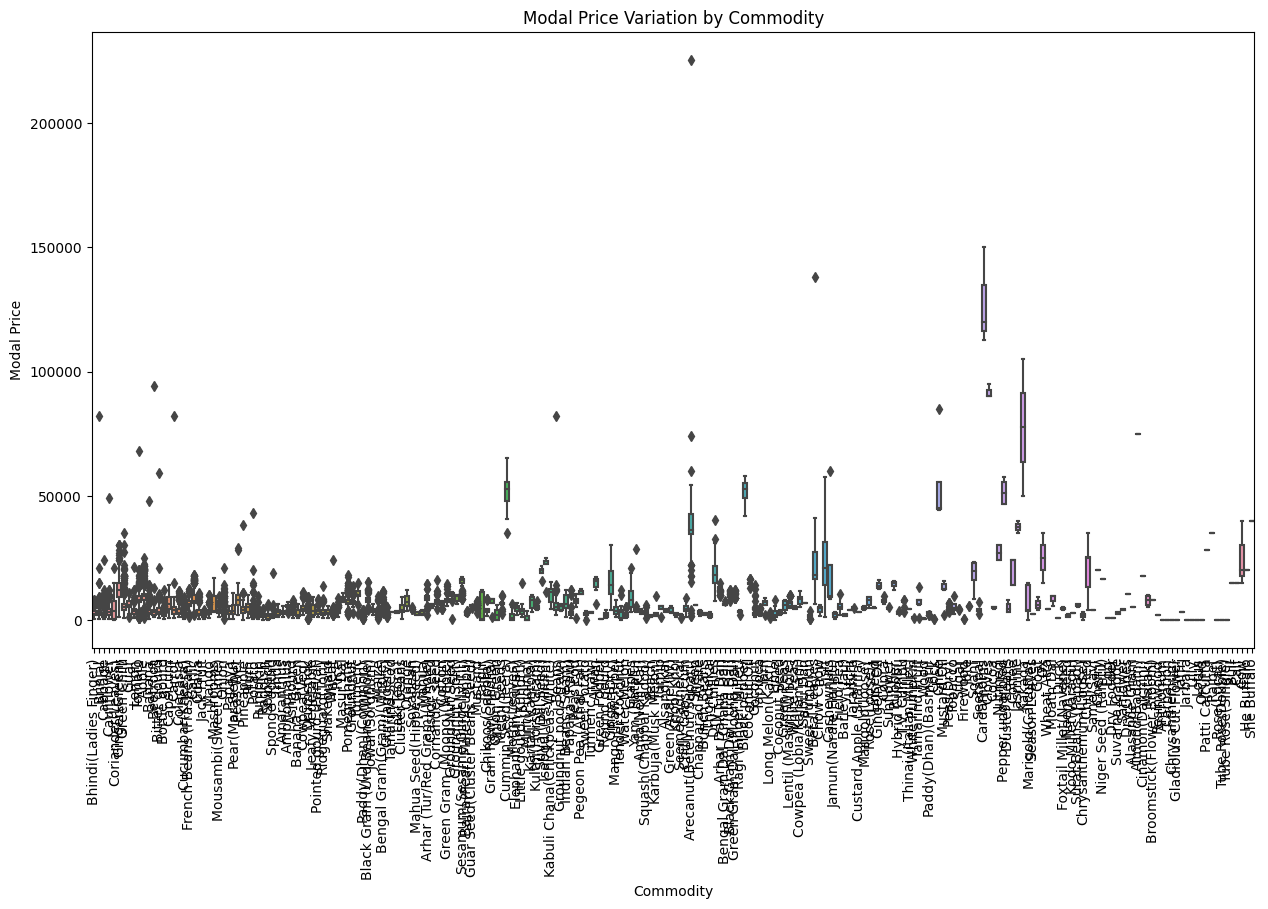

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Commodity', y='Modal Price', data=df)
plt.xticks(rotation=90)
plt.title('Modal Price Variation by Commodity')
plt.show()


# Price Trends Over Time:

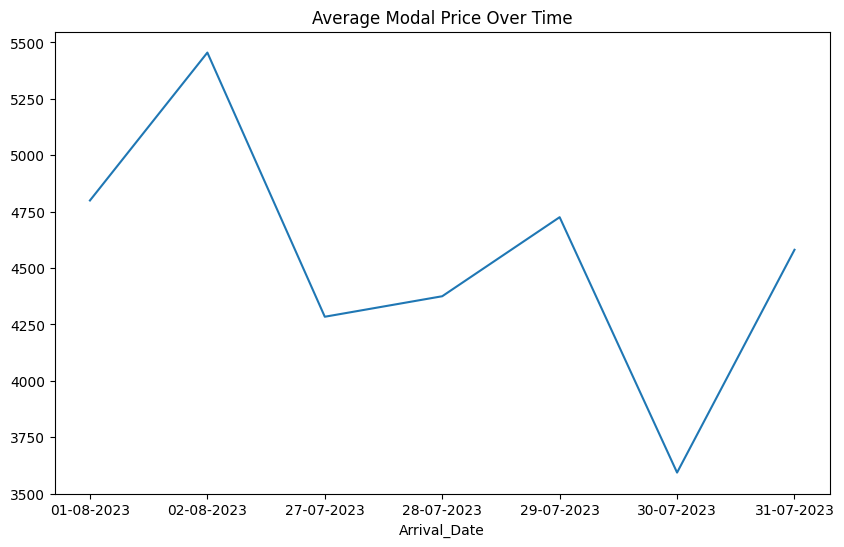

In [13]:
# Line plot for prices over time
df.groupby('Arrival_Date')['Modal Price'].mean().plot(figsize=(10,6), title='Average Modal Price Over Time')
plt.show()


# State-wise Analysis:

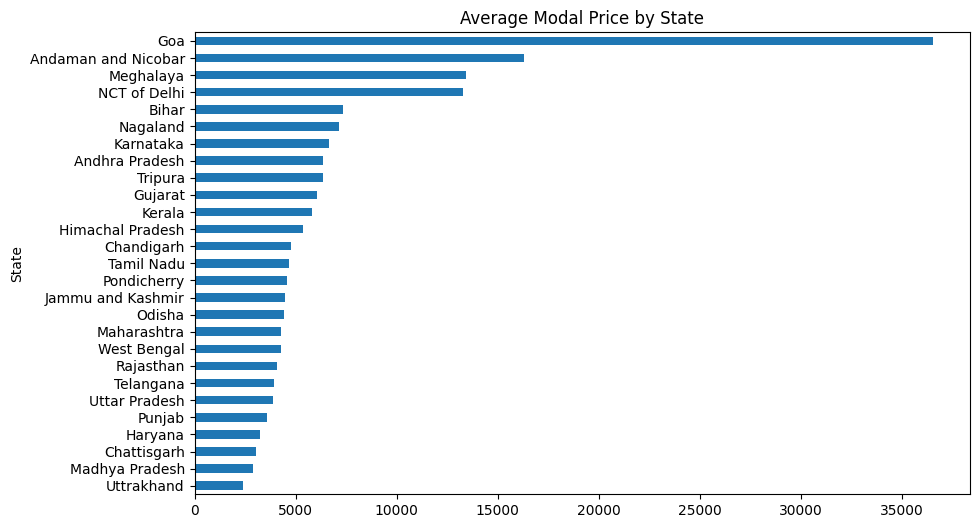

In [14]:
# Compare average prices between states
df.groupby('State')['Modal Price'].mean().sort_values().plot(kind='barh', figsize=(10,6), title='Average Modal Price by State')
plt.show()


# Correlation Analysis

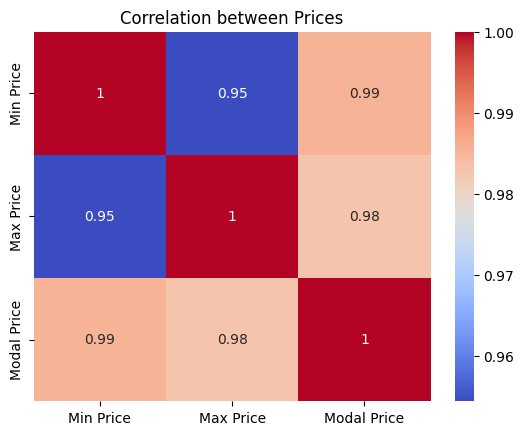

In [15]:
# Correlation matrix
corr_matrix = df[['Min Price', 'Max Price', 'Modal Price']].corr()

# Heatmap of correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Prices')
plt.show()


# Outlier Detection

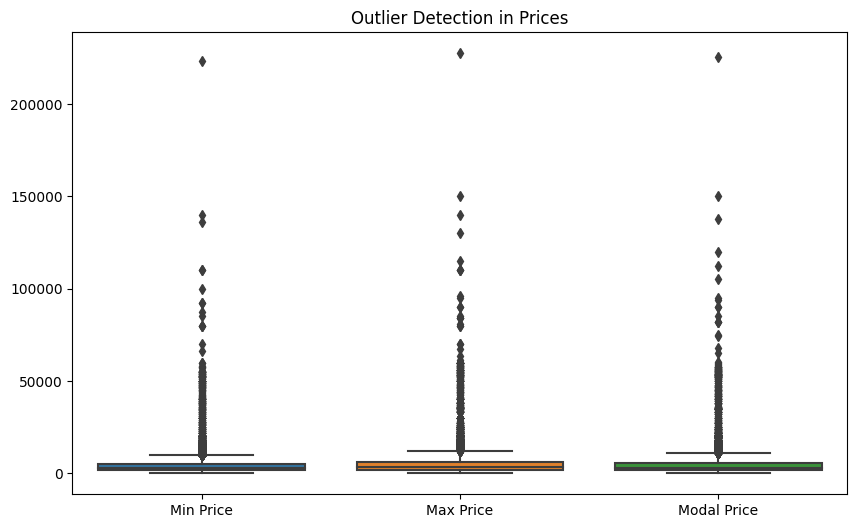

In [16]:
# Boxplot for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Min Price', 'Max Price', 'Modal Price']])
plt.title('Outlier Detection in Prices')
plt.show()


# Commodity-Specific Analysis

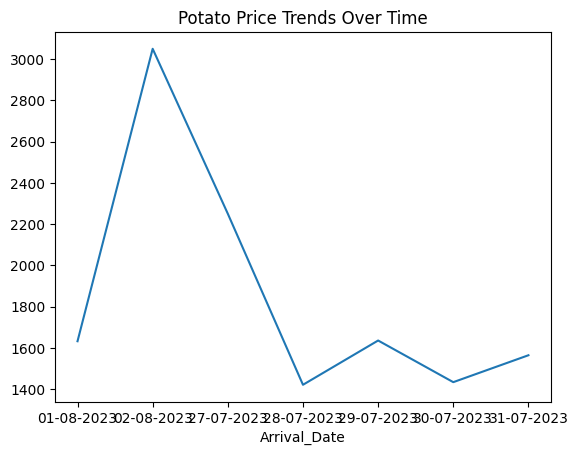

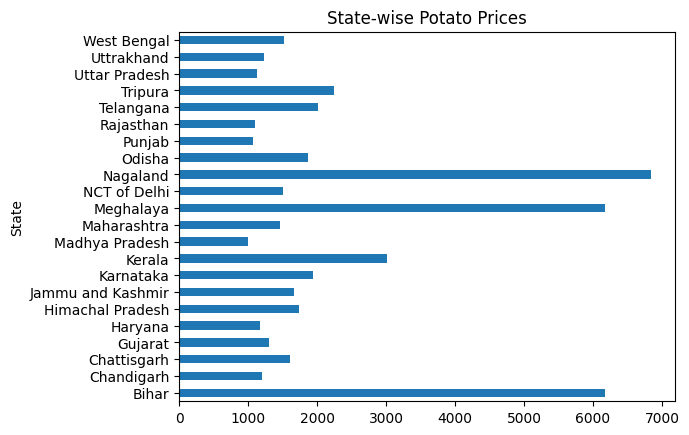

In [17]:
# Filtering data for a specific commodity, e.g., 'Potato'
potato_data = df[df['Commodity'] == 'Potato']

# Plot modal price over time for 'Potato'
potato_data.groupby('Arrival_Date')['Modal Price'].mean().plot(title='Potato Price Trends Over Time')
plt.show()

# State-wise price comparison for 'Potato'
potato_data.groupby('State')['Modal Price'].mean().plot(kind='barh', title='State-wise Potato Prices')
plt.show()


# Multivariate Analysis

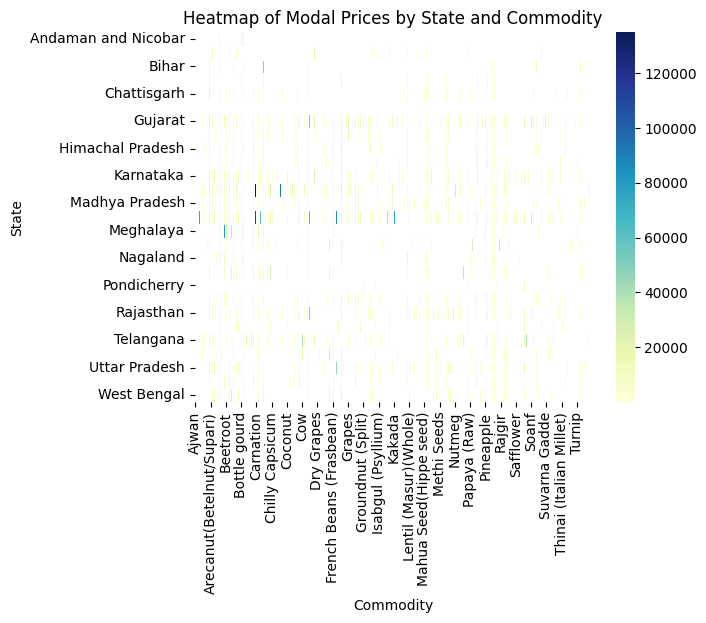

In [18]:
# Pivot table to analyze the relationship between State, Commodity, and Modal Price
pivot_table = df.pivot_table(values='Modal Price', index='State', columns='Commodity', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Modal Prices by State and Commodity')
plt.show()


In [32]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\Bhavani Balijireddi\Downloads\Price_Agriculture_commodities_Week.csv")

# Data Preprocessing
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month
df['Day'] = df['Arrival_Date'].dt.day
df.drop(columns=['Arrival_Date'], inplace=True)
df.fillna(method='ffill', inplace=True)

# Store unique commodities
commodities = df['Commodity'].copy()

# Encode categorical variables
df = pd.get_dummies(df, columns=['State', 'District', 'Market', 'Variety', 'Grade'], drop_first=True)

# Select features and target variable
X = df.drop(columns=['Modal Price', 'Commodity'])  # Features (including dropping 'Commodity')
y = df['Modal Price']                               # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Prepare predictions DataFrame
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Reset index to align with X_test
predictions_df.reset_index(drop=True, inplace=True)

# Get the original indices from the test set
original_indices = X_test.index

# Add commodities to predictions DataFrame using original indices
predictions_df['Commodity'] = commodities[original_indices].values

# Display predictions with commodities
print(predictions_df[['Commodity', 'Actual Price', 'Predicted Price']].head())
print(predictions_df[['Commodity', 'Actual Price', 'Predicted Price']])

Mean Squared Error: 5972752573631.98
Mean Absolute Error: 161255.39
R^2 Score: -193306.82
     Commodity  Actual Price  Predicted Price
0  Castor Seed        6330.0       6329.90625
1       Garlic        7400.0       7813.03125
2  Pomegranate        5000.0       4450.37500
3       Papaya        2250.0       2390.21875
4      Pumpkin        1340.0       1337.06250
             Commodity  Actual Price  Predicted Price
0          Castor Seed        6330.0       6329.90625
1               Garlic        7400.0       7813.03125
2          Pomegranate        5000.0       4450.37500
3               Papaya        2250.0       2390.21875
4              Pumpkin        1340.0       1337.06250
...                ...           ...              ...
4614  Ridgeguard(Tori)        2100.0       2024.90625
4615             Lemon         950.0        871.62500
4616            Potato        1600.0       1646.56250
4617             Onion        1600.0       1544.62500
4618              Fish       17500.0    

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\Bhavani Balijireddi\Downloads\Price_Agriculture_commodities_Week.csv")

# Data Preprocessing
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month
df['Day'] = df['Arrival_Date'].dt.day
df.drop(columns=['Arrival_Date'], inplace=True)
df.fillna(method='ffill', inplace=True)

# Store unique commodities
commodities = df['Commodity'].copy()

# Encode categorical variables
df = pd.get_dummies(df, columns=['State', 'District', 'Market', 'Variety', 'Grade'], drop_first=True)

# Select features and target variable
X = df.drop(columns=['Modal Price', 'Commodity'])  # Features
y = df['Modal Price']                               # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate "Accuracy" as 100% - MAPE
accuracy = 100 - mape

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'Accuracy: {accuracy:.2f}%')

# Prepare predictions DataFrame
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Reset index to align with X_test
predictions_df.reset_index(drop=True, inplace=True)

# Get the original indices from the test set
original_indices = X_test.index

# Add commodities to predictions DataFrame using original indices
predictions_df['Commodity'] = commodities[original_indices].values

# Display predictions with commodities
print(predictions_df[['Commodity', 'Actual Price', 'Predicted Price']].head())
print(predictions_df[['Commodity', 'Actual Price', 'Predicted Price']])

Mean Squared Error: 269378.09
Mean Absolute Error: 83.16
R^2 Score: 0.99
Mean Absolute Percentage Error: 1.87%
Accuracy: 98.13%
     Commodity  Actual Price  Predicted Price
0  Castor Seed        6330.0          6295.29
1       Garlic        7400.0          7401.30
2  Pomegranate        5000.0          5017.00
3       Papaya        2250.0          2231.50
4      Pumpkin        1340.0          1356.50
             Commodity  Actual Price  Predicted Price
0          Castor Seed        6330.0          6295.29
1               Garlic        7400.0          7401.30
2          Pomegranate        5000.0          5017.00
3               Papaya        2250.0          2231.50
4              Pumpkin        1340.0          1356.50
...                ...           ...              ...
4614  Ridgeguard(Tori)        2100.0          2098.11
4615             Lemon         950.0           857.25
4616            Potato        1600.0          1611.76
4617             Onion        1600.0          1504.10
46

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\Bhavani Balijireddi\Downloads\Price_Agriculture_commodities_Week.csv")

# Data Preprocessing
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month
df['Day'] = df['Arrival_Date'].dt.day
df.drop(columns=['Arrival_Date'], inplace=True)
df.fillna(method='ffill', inplace=True)

# Store unique commodities
commodities = df['Commodity'].copy()

# Encode categorical variables
df = pd.get_dummies(df, columns=['State', 'District', 'Market', 'Variety', 'Grade'], drop_first=True)

# Encode cyclical features for Month and Day
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df.drop(columns=['Month', 'Day'], inplace=True)

# Select features and target variable
X = df.drop(columns=['Modal Price', 'Commodity'])  # Features
y = np.log1p(df['Modal Price'])  # Log transform the target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning with SVR
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear']
}
svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Inverse transform the target variable
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test_exp, y_pred_exp)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Prepare predictions DataFrame
predictions_df = pd.DataFrame({'Actual Price': y_test_exp, 'Predicted Price': y_pred_exp})

# Reset index to align with X_test
predictions_df.reset_index(drop=True, inplace=True)


# Get the original indices from the test set
original_indices = X_test.index

# Add commodities to predictions DataFrame using original indices
predictions_df['Commodity'] = commodities[original_indices].values

# Display predictions with commodities
print(predictions_df[['Commodity', 'Actual Price', 'Predicted Price']].head())
